# Dados e Aprendizagem Automática
### Part IX

## **K-medoids using Blobs Dataset - II**

#### Imports, installations and settings

In [3]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

#### Create the dataset using Blobs

In [4]:
from sklearn.datasets import make_blobs

In [5]:
data = make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.8,random_state=2022)

#### Define X and y

In [6]:
X = data[0]
y = data[1]

#### Visualize the data

View the first 5 lines of the data set:

In [7]:
print('X:',X[0:5,:])
print('y:',y[0:5])

X: [[  5.88508997   2.9021639 ]
 [ -8.20429992 -11.68670283]
 [  1.9125188   -2.76746603]
 [ -9.39601207  -7.2830252 ]
 [  6.1986976    7.32152342]]
y: [2 1 2 1 3]


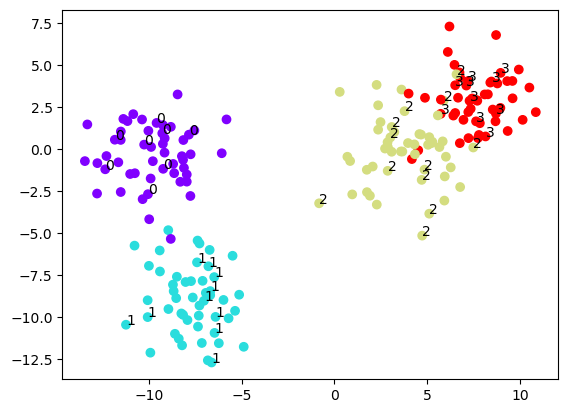

In [8]:
plt.scatter(X[:,0],X[:,1], c = y, cmap = 'rainbow')
for i, txt in enumerate(y):
    if i%5 == 0:
        plt.annotate(txt, (X[i,0],X[i,1]))

### Create the clusters

#### With K-Medoids
* https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html  
* https://pypi.org/project/kmedoids/

In [10]:
from sklearn_extra.cluster import KMedoids

In [11]:
kmedoids = KMedoids(n_clusters=4,random_state=2022)

In [12]:
kmedoids.fit(X)

KMedoids(n_clusters=4, random_state=2022)

Center of the 4 clusters

In [13]:
kmedoids.cluster_centers_

array([[-7.62795904, -8.8354951 ],
       [-9.87312876,  0.13931247],
       [ 3.65994783, -0.13260646],
       [ 7.66163195,  2.9333056 ]])

Associated labels

In [14]:
kmedoids.labels_

array([3, 0, 2, 0, 3, 1, 0, 1, 2, 2, 3, 3, 2, 3, 1, 3, 3, 3, 3, 1, 0, 2,
       3, 3, 0, 0, 2, 0, 2, 2, 3, 0, 3, 2, 3, 2, 0, 3, 0, 1, 3, 1, 3, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 3, 3, 0, 2, 3, 2, 3, 1, 1, 1, 2, 2, 3, 1,
       0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 3, 3, 1, 2, 0, 0, 3, 2,
       1, 0, 2, 3, 1, 2, 2, 3, 2, 1, 2, 2, 0, 3, 1, 0, 1, 2, 1, 2, 1, 1,
       3, 1, 1, 1, 2, 1, 2, 2, 0, 2, 3, 3, 3, 2, 0, 0, 3, 2, 1, 3, 0, 1,
       1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 0, 3, 0, 1, 2, 1, 2, 2, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 3, 1, 2, 3, 3, 0, 2, 3,
       2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 3, 3, 1, 2, 1, 2, 2, 0, 1, 3, 1, 0,
       1, 1])

#### Visualize the clusters

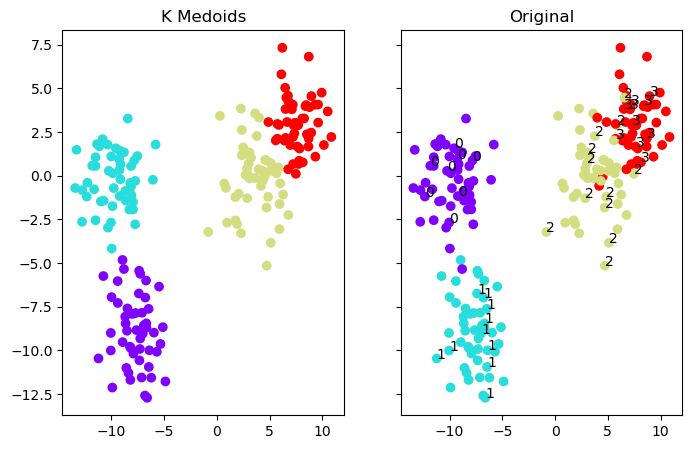

In [16]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True,figsize=(8,5))
ax1.set_title('K Medoids')
ax1.scatter(X[:, 0], X[:, 1], c = kmedoids.labels_, cmap = 'rainbow')
ax2.set_title("Original")
ax2.scatter(X[:, 0], X[:, 1], c = y, cmap = 'rainbow')
for i, txt in enumerate(y):
    if i%5 == 0:
        plt.annotate(txt, (X[i,0],X[i,1]))
#plt.savefig()

##### Align K-Medoids prediction class with real values

In [17]:
y_pred = kmedoids.predict(X)

In [18]:
y_pred

array([3, 0, 2, 0, 3, 1, 0, 1, 2, 2, 3, 3, 2, 3, 1, 3, 3, 3, 3, 1, 0, 2,
       3, 3, 0, 0, 2, 0, 2, 2, 3, 0, 3, 2, 3, 2, 0, 3, 0, 1, 3, 1, 3, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 3, 3, 0, 2, 3, 2, 3, 1, 1, 1, 2, 2, 3, 1,
       0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 3, 3, 1, 2, 0, 0, 3, 2,
       1, 0, 2, 3, 1, 2, 2, 3, 2, 1, 2, 2, 0, 3, 1, 0, 1, 2, 1, 2, 1, 1,
       3, 1, 1, 1, 2, 1, 2, 2, 0, 2, 3, 3, 3, 2, 0, 0, 3, 2, 1, 3, 0, 1,
       1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 0, 3, 0, 1, 2, 1, 2, 2, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 3, 1, 2, 3, 3, 0, 2, 3,
       2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 3, 3, 1, 2, 1, 2, 2, 0, 1, 3, 1, 0,
       1, 1])

In [19]:
y

array([2, 1, 2, 1, 3, 0, 1, 0, 2, 2, 3, 3, 2, 3, 0, 3, 3, 3, 3, 0, 1, 2,
       3, 3, 1, 1, 3, 1, 2, 2, 3, 1, 3, 3, 3, 2, 1, 3, 1, 0, 3, 0, 3, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 3, 0, 0, 0, 2, 2, 3, 0,
       1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 3, 0, 2, 1, 1, 3, 2,
       0, 1, 2, 3, 0, 2, 2, 3, 2, 0, 2, 2, 1, 3, 0, 1, 0, 2, 0, 2, 0, 0,
       3, 0, 0, 0, 2, 0, 2, 2, 1, 2, 3, 3, 3, 2, 1, 1, 3, 2, 0, 3, 1, 0,
       0, 1, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 1, 3, 1, 0, 2, 0, 2, 2, 3, 3,
       2, 3, 3, 3, 0, 1, 1, 1, 1, 2, 3, 0, 1, 1, 3, 0, 2, 3, 3, 1, 2, 3,
       2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 3, 3, 0, 2, 0, 3, 2, 1, 0, 2, 0, 1,
       0, 0])

In [21]:
y_pred = np.where(y_pred==1, 10, y_pred)
y_pred = np.where(y_pred==0,1, y_pred)
y_pred = np.where(y_pred==10,0, y_pred)

In [22]:
y_pred

array([3, 1, 2, 1, 3, 0, 1, 0, 2, 2, 3, 3, 2, 3, 0, 3, 3, 3, 3, 0, 1, 2,
       3, 3, 1, 1, 2, 1, 2, 2, 3, 1, 3, 2, 3, 2, 1, 3, 1, 0, 3, 0, 3, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 3, 0, 0, 0, 2, 2, 3, 0,
       1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 3, 3, 0, 2, 1, 1, 3, 2,
       0, 1, 2, 3, 0, 2, 2, 3, 2, 0, 2, 2, 1, 3, 0, 1, 0, 2, 0, 2, 0, 0,
       3, 0, 0, 0, 2, 0, 2, 2, 1, 2, 3, 3, 3, 2, 1, 1, 3, 2, 0, 3, 1, 0,
       0, 1, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 1, 3, 1, 0, 2, 0, 2, 2, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 3, 0, 1, 1, 3, 0, 2, 3, 3, 1, 2, 3,
       2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 3, 3, 0, 2, 0, 2, 2, 1, 0, 3, 0, 1,
       0, 0])

#### Redo the visualizations

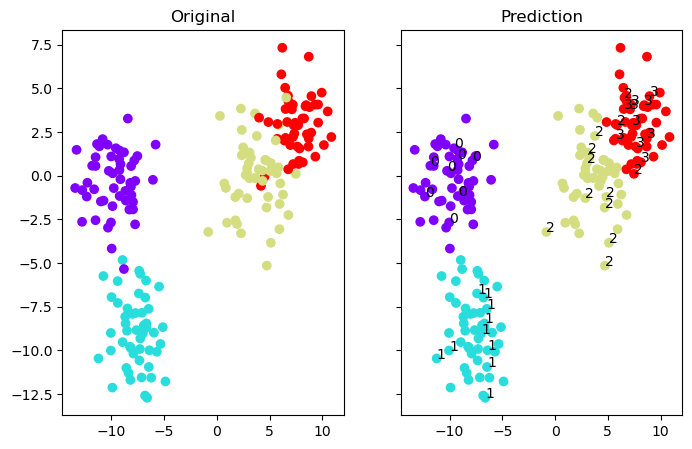

In [24]:
f, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize = (8, 5))
ax1.set_title('Original')
ax1.scatter(X[:, 0], X[:, 1], c = y, cmap = 'rainbow')
ax2.set_title("Prediction")
ax2.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'rainbow')
for i, txt in enumerate(y):
    if i%5 == 0:
        plt.annotate(txt, (X[i,0],X[i,1]))
#plt.savefig("")

#### Evaluate the model

In [25]:
print(confusion_matrix(y,y_pred))

[[49  1  0  0]
 [ 0 50  0  0]
 [ 0  0 46  4]
 [ 0  0  3 47]]


In [26]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50
           2       0.94      0.92      0.93        50
           3       0.92      0.94      0.93        50

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

